In [6]:
# display plots in this notebook
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# set display defaults
plt.rcParams['figure.figsize'] = (2, 2) 
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

import numpy as np
from PIL import Image

import sys
caffe_root = '/home/haonans/software/caffe-video_triplet/'
sys.path.insert(0, caffe_root + 'python')

import caffe

caffe.set_mode_gpu()

In [7]:
model_def = '/home/haonans/software/caffe-video_triplet/rank_scripts/rank_alexnet/unsup_net_deploy.prototxt'
model_weights = '/home/haonans/capstone/video_models/unsup_alexnet/video_margin_05_iter_40000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

# set the size of the input (we can skip this if we're happy
# with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(50,        # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227

In [8]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]

def get_fc7_vector(image_obj):
    # image_obj = caffe.io.load_image(image_fname)
    
    transformed_image = transformer.preprocess('data', image_obj)
    
    net.blobs['data'].data[...] = transformed_image
    output = net.forward()
    fc7_vector = output['fc7'][0]
    
    return np.array(fc7_vector)

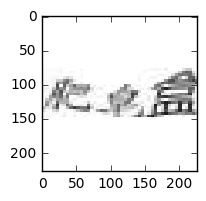

In [21]:
img1 = caffe.io.load_image('/home/haonans/capstone/data/testing/1.jpg')
plt.imshow(img1)

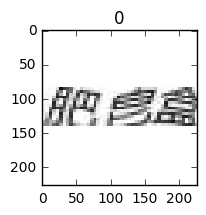

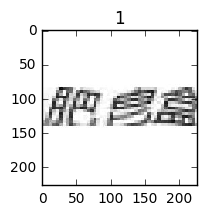

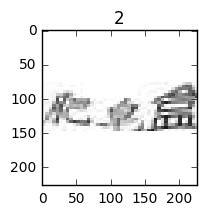

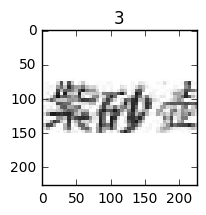

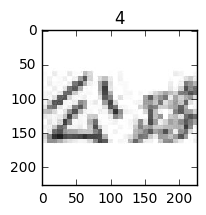

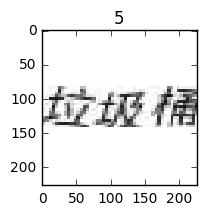

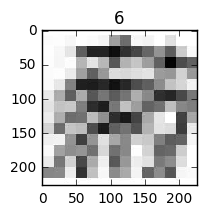

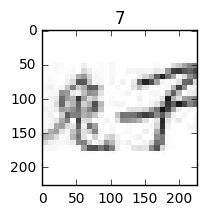

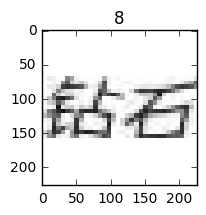

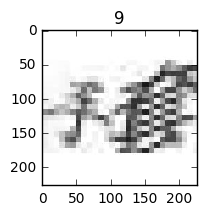

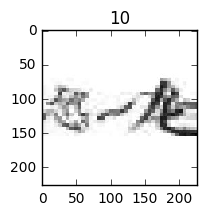

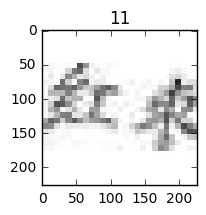

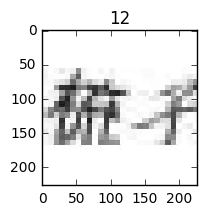

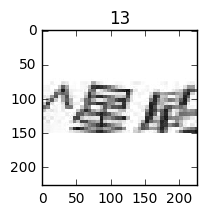

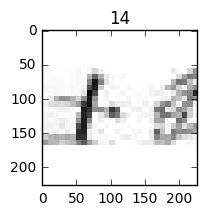

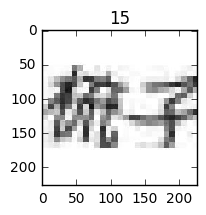

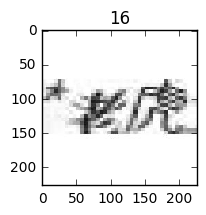

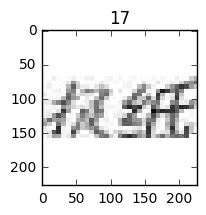

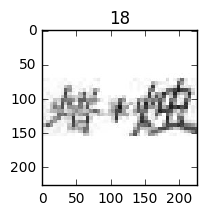

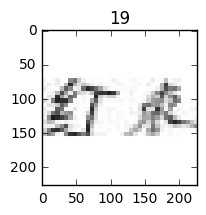

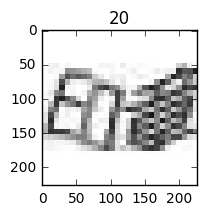

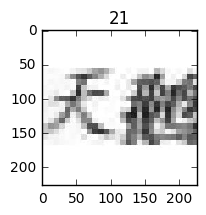

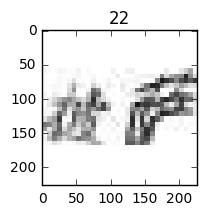

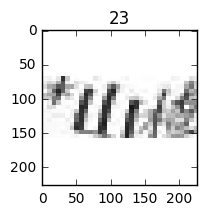

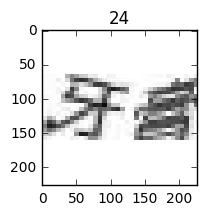

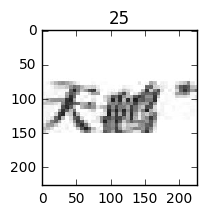

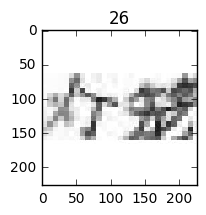

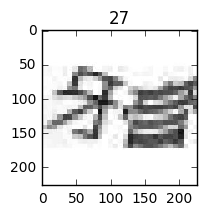

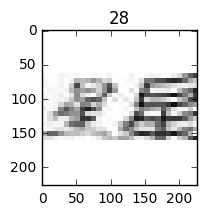

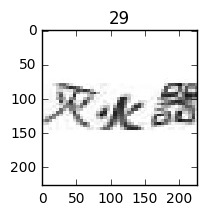

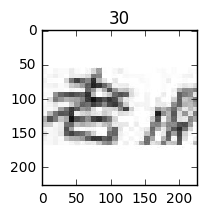

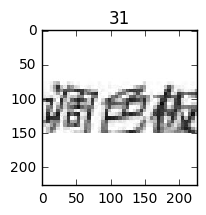

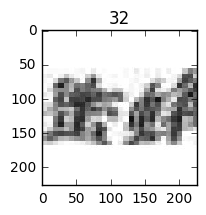

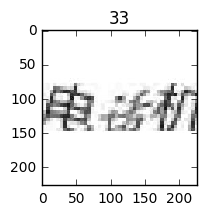

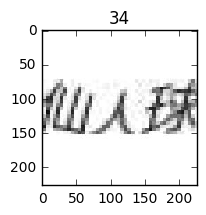

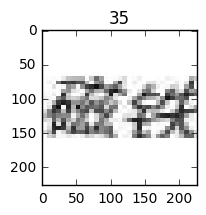

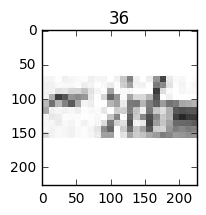

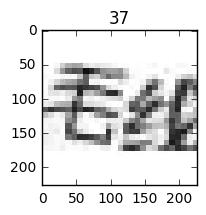

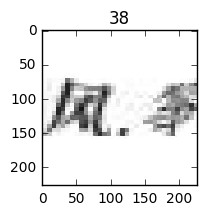

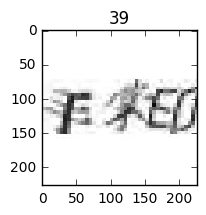

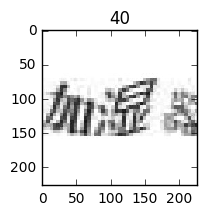

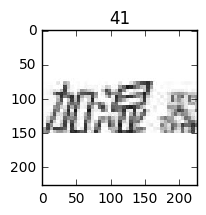

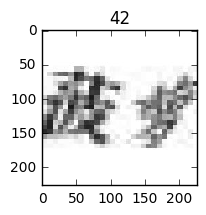

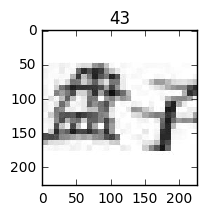

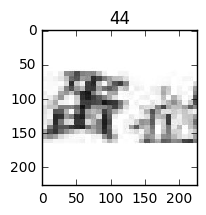

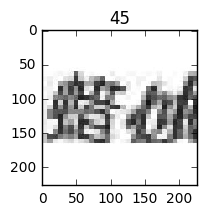

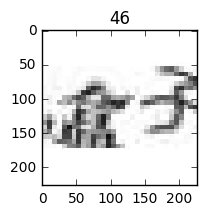

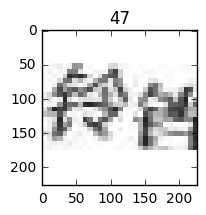

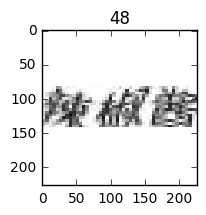

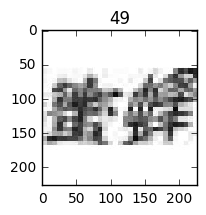

In [30]:
import os

test_fnames = map(lambda fname: os.path.join('/home/haonans/capstone/data/testing/', fname), 
                 os.listdir('/home/haonans/capstone/data/testing/')[:50])

for i, img_fname in enumerate(test_fnames):
    img = caffe.io.load_image(img_fname)
    plt.figure(i)
    plt.imshow(img)
    plt.title(i)

In [62]:
# fei zao he
img_list1 = map(caffe.io.load_image, [test_fnames[0], test_fnames[1]])
vector_list1 = map(get_fc7_vector, img_list1)

# shu zi
img_list2 = map(caffe.io.load_image, [test_fnames[12], test_fnames[15]])
vector_list2 = map(get_fc7_vector, img_list2)

# jia shi qi
img_list3 = map(caffe.io.load_image, [test_fnames[40], test_fnames[41]])
vector_list3 = map(get_fc7_vector, img_list3)

# ya gao
img_list4 = map(caffe.io.load_image, [test_fnames[24], test_fnames[27]])
vector_list4 = map(get_fc7_vector, img_list4)

In [63]:
img_list = img_list1 + img_list2 + img_list3 + img_list4
vector_list = map(get_fc7_vector, img_list)

In [73]:
print cosine(vector_list1[0], vector_list1[1])
print cosine(vector_list2[0], vector_list2[1])
print cosine(vector_list3[0], vector_list3[1])
print cosine(vector_list4[0], vector_list4[1])
print 
print cosine(vector_list1[0], vector_list2[1])
print cosine(vector_list1[0], vector_list3[1])
print cosine(vector_list1[0], vector_list4[1])
print cosine(vector_list2[0], vector_list3[1])
print cosine(vector_list2[0], vector_list4[1])
print cosine(vector_list3[0], vector_list4[1])

3.38461432214e-08
0.110067778583
0.0708887599418
0.0252398926552

0.705429594778
0.665014689537
1.0
0.807506381433
0.365090007857
0.998857611448


In [69]:
import itertools

sim_matrix = np.zeros((8, 8))

for i, j in itertools.product(xrange(8), xrange(8)):
    cur_sim = cosine(vector_list[i], vector_list[j])
    print i, j, cur_sim
    sim_matrix[i][j] = cur_sim
    
print sim_matrix

0 0 nan
0 1 nan
0 2 nan
0 3 nan
0 4 nan
0 5 nan
0 6 nan
0 7 nan
1 0 nan
1 1 nan
1 2 nan
1 3 nan
1 4 nan
1 5 nan
1 6 nan
1 7 nan
2 0 nan
2 1 nan
2 2 3.90156170704e-08
2 3 2.85442175452e-08
2 4 nan
2 5 nan
2 6 2.51735254864e-08
2 7 -1.32587005819e-08
3 0 nan
3 1 nan
3 2 2.85442175452e-08
3 3 2.29341706737e-08
3 4 nan
3 5 nan
3 6 3.65864516461e-09
3 7 -1.97330909391e-08
4 0 nan
4 1 nan
4 2 nan
4 3 nan
4 4 nan
4 5 nan
4 6 nan
4 7 nan
5 0 nan
5 1 nan
5 2 nan
5 3 nan
5 4 nan
5 5 nan
5 6 nan
5 7 nan
6 0 nan
6 1 nan
6 2 2.51735254864e-08
6 3 3.65864516461e-09
6 4 nan
6 5 nan
6 6 -2.1461138866e-08
6 7 3.97084454207e-09
7 0 nan
7 1 nan
7 2 -1.32587005819e-08
7 3 -1.97330909391e-08
7 4 nan
7 5 nan
7 6 3.97084454207e-09
7 7 -1.32779582884e-08
[[             nan              nan              nan              nan
               nan              nan              nan              nan]
 [             nan              nan              nan              nan
               nan              nan             